# Analysis of tr_cot Dataset

This notebook analyzes the tr_cot dataset stored in parquet format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import os
from pathlib import Path

# Configure plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')
pd.set_option('display.max_columns', None)

## Data Loading

In [2]:
# Define dataset path
DATASET_PATH = "/Users/jia/datasets/data/tr_cot/train"

# Check if the path exists
if os.path.exists(DATASET_PATH):
    print(f"Dataset path exists: {DATASET_PATH}")
    # List all parquet files
    parquet_files = list(Path(DATASET_PATH).glob("*.parquet"))
    print(f"Found {len(parquet_files)} parquet files:")
    for file in parquet_files:
        print(f"  - {file.name}")
else:
    print(f"Dataset path does not exist: {DATASET_PATH}")

Dataset path exists: /Users/jia/datasets/data/tr_cot/train
Found 3 parquet files:
  - train-00002-of-00003.parquet
  - train-00001-of-00003.parquet
  - train-00000-of-00003.parquet


In [3]:
# Load the first parquet file for analysis
if 'parquet_files' in locals() and len(parquet_files) > 0:
    df = pd.read_parquet(parquet_files[0])
    print(f"Successfully loaded {parquet_files[0].name}")
    print(f"Dataset shape: {df.shape}")
else:
    print("No parquet files found")
    df = pd.DataFrame()

Successfully loaded train-00002-of-00003.parquet
Dataset shape: (11014, 4)


## Data Overview

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11014 entries, 0 to 11013
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       11014 non-null  object
 1   code     11014 non-null  object
 2   caption  11014 non-null  object
 3   image    11014 non-null  object
dtypes: object(4)
memory usage: 344.3+ KB


In [5]:
# Show first few rows
df.head()

,id,code,caption,image
0,rcot-polygon_20897,,"There is a quadrilateral in the diagram, repre...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
1,rcot-polygon_9907,,"There is a parallelogram in the diagram, repre...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
2,rcot-polygon_12884,,"There is a trapezoid in the diagram, represent...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
3,rcot-polygon_19909,,"There is a trapezoid in the diagram, represent...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...
4,rcot-polygon_18423,,"There is a rhombus in the diagram, represented...",{'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHD...


In [6]:
# Check for missing values
df.isnull().sum()

id         0
code       0
caption    0
image      0
dtype: int64

## Text Statistics

Text columns identified: ['id', 'code', 'caption', 'image']

Statistics for id length:
count    11014.000000
mean        16.971218
std          0.891044
min         13.000000
25%         16.000000
50%         17.000000
75%         18.000000
max         18.000000
Name: id_length, dtype: float64


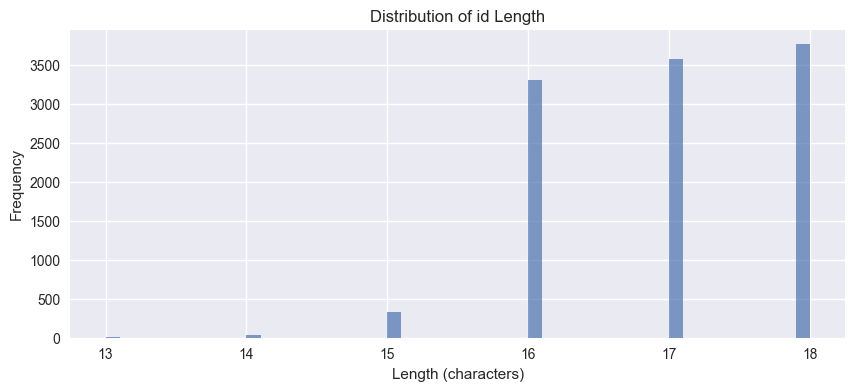


Statistics for code length:
count    11014.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: code_length, dtype: float64


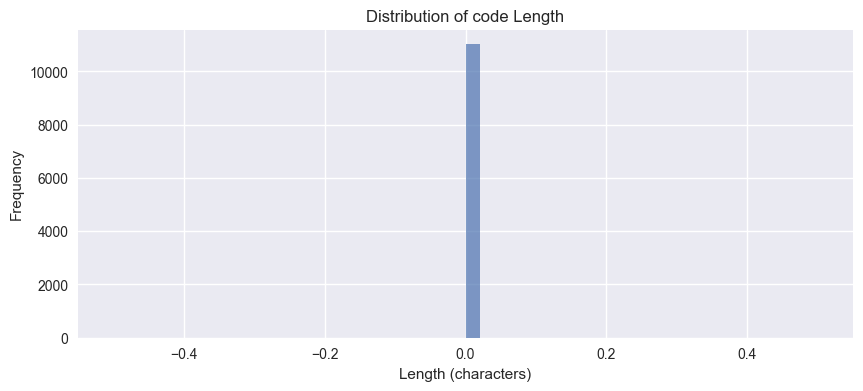


Statistics for caption length:
count    11014.000000
mean       475.443345
std        128.412496
min        117.000000
25%        381.000000
50%        455.000000
75%        555.750000
max        838.000000
Name: caption_length, dtype: float64


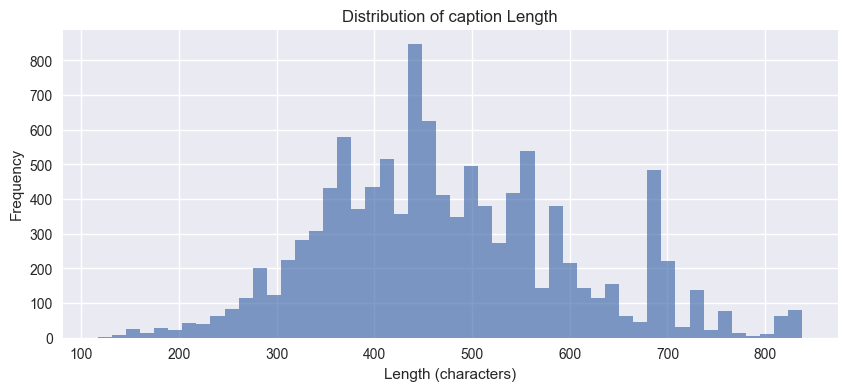


Statistics for image length:


count     11014.000000
mean     109868.314781
std       23802.571001
min       32421.000000
25%       94552.750000
50%      109526.500000
75%      125083.000000
max      194396.000000
Name: image_length, dtype: float64


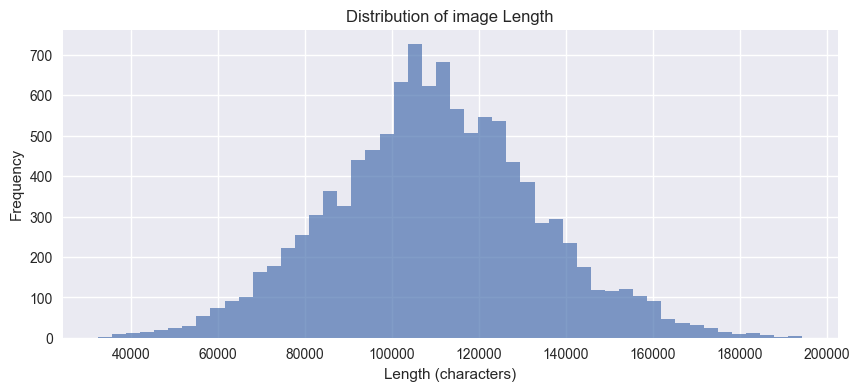

In [7]:
# Calculate text length statistics if text columns exist
text_columns = []
for col in df.columns:
    if df[col].dtype == 'object':
        text_columns.append(col)

print(f"Text columns identified: {text_columns}")

for col in text_columns:
    if df[col].dtype == 'object' and df[col].notnull().any():
        df[f'{col}_length'] = df[col].astype(str).str.len()
        print(f"\nStatistics for {col} length:")
        print(df[f'{col}_length'].describe())
        
        # Plot histogram
        plt.figure(figsize=(10, 4))
        plt.hist(df[f'{col}_length'], bins=50, alpha=0.7)
        plt.title(f'Distribution of {col} Length')
        plt.xlabel('Length (characters)')
        plt.ylabel('Frequency')
        plt.show()

## Image Data Analysis

In [8]:
# Check image data if present
image_columns = [col for col in df.columns if 'image' in col.lower()]
print(f"Potential image columns: {image_columns}")

for col in image_columns:
    if col in df.columns:
        image_data_exists = df[col].notnull().sum()
        total_rows = len(df)
        coverage = (image_data_exists / total_rows) * 100
        print(f"\n{col} column:")
        print(f"  - Total entries: {total_rows}")
        print(f"  - Entries with image data: {image_data_exists}")
        print(f"  - Coverage: {coverage:.2f}%")
        
        # Show sample of image data structure
        if image_data_exists > 0:
            sample = df[col].dropna().iloc[0]
            print(f"  - Sample data type: {type(sample)}")
            if hasattr(sample, '__dict__') or isinstance(sample, (dict, list)):
                print(f"  - Sample data structure: {sample}")

Potential image columns: ['image', 'image_length']

image column:
  - Total entries: 11014
  - Entries with image data: 11014
  - Coverage: 100.00%
  - Sample data type: <class 'dict'>
  - Sample data structure: {'bytes': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08\x02\x00\x00\x00{\x1aC\xad\x00\x00 \x00IDATx\x01\xec\xc1\x0bX\xcf\xe7\xff8\xfe\xe7\xeb\xdd\xfb\xee\x9c\x8aD&\x849\x1f>3\xc6\xc6\x98\xe5\x90\x86ac\xc50\xc2G#\x9a\x1c*w\xaf\xba\xab\xbb\x94S\xa85\xc71s\x1c\x0b9\xcdql\xe6lc\x0ea\xd6\x0c%B$\x1d\xee\xde=\xff\xdf\xcbu\xedwm\xffe\xcb\xe9#\xde\xcf\xc7CCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\x08!\xe6GCD \x84\x10b~4D\x04B\

## Sample Data Display

In [9]:
# Display sample data
sample_size = min(5, len(df))
sample_df = df.sample(n=sample_size, random_state=42)

for idx, row in sample_df.iterrows():
    print(f"\n--- Sample {idx} ---")
    for col in df.columns:
        if col not in image_columns:
            print(f"{col}: {row[col]}")
        else:
            img_data = row[col]
            print(f"{col}: [Image data - type: {type(img_data).__name__}]")


--- Sample 8296 ---
id: rcot-polygon_12068
code: 
caption: There is a hexagon in the diagram, represented by the symbol PBQLJZ. The measure of angle ZPB is equal to 90 degrees. The measure of angle PBQ is equal to 90 degrees. The length of line JZ is 5. Line LI is the line connecting point L and the midpoint I of line PB. Point I lies on line PB. The length of line IP equals the length of line IB.Line PY is the line connecting point P and the midpoint Y of line BQ. Point Y lies on line BQ. The length of line YB equals the length of line YQ.
image: [Image data - type: dict]
id_length: 18
code_length: 0
caption_length: 487
image_length: [Image data - type: int]

--- Sample 10759 ---
id: rcot-polygon_622
code: 
caption: There is a square in the diagram, represented by the symbol QRPH. The length of line HQ is 6. Line QH is perpendicular to line PH. Point H lies on line PH. Line HQ is perpendicular to line QR. Point Q lies on line QR. Line HP is perpendicular to line RP. Point P lies on l

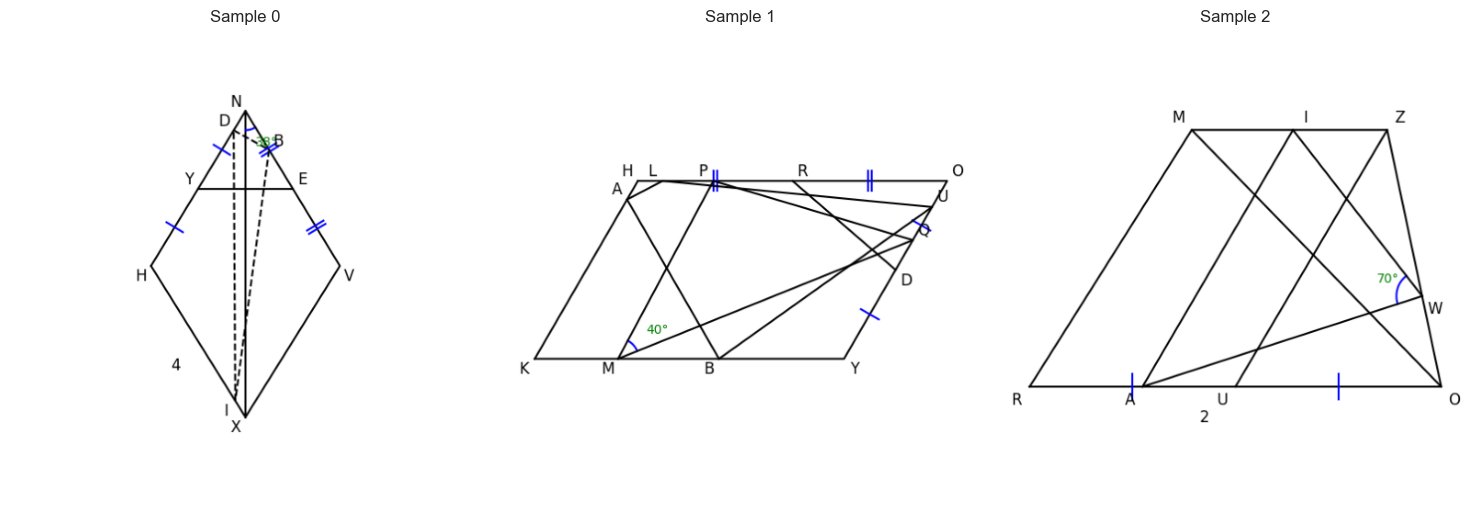

In [10]:
# Try to render sample images if possible
image_cols = [col for col in df.columns if 'image' in col.lower()]
if image_cols and len(df[image_cols].dropna()) > 0:
    try:
        sample_images = df[image_cols].dropna().head(3)
        fig, axes = plt.subplots(1, len(sample_images), figsize=(15, 5))
        if len(sample_images) == 1:
            axes = [axes]
        
        for i, (idx, row) in enumerate(sample_images.iterrows()):
            img_data = row[image_cols[0]]
            # Try to display the image depending on its format
            if hasattr(img_data, 'keys') and 'bytes' in img_data.keys():
                # Image stored as dict with bytes
                import io
                from PIL import Image
                img_bytes = img_data['bytes']
                img = Image.open(io.BytesIO(img_bytes))
                axes[i].imshow(img)
                axes[i].set_title(f'Sample {idx}')
            elif isinstance(img_data, bytes):
                # Direct image bytes
                import io
                from PIL import Image
                img = Image.open(io.BytesIO(img_data))
                axes[i].imshow(img)
                axes[i].set_title(f'Sample {idx}')
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    except Exception as e:
        print(f"Could not display images: {e}")
else:
    print("No image columns found or no image data available.")